In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def sigmoid(xs):
    '''
    Apply sigmoid function to each point.
    Input:
        xs: ndarray of shape (n,)
    Return:
        ndarray of shape n
    '''
    return 1 / (1 + np.exp(-xs))

def fit(xs, ys, max_iter=100):
    '''
    Given paired features and labels, estimate the weights by the Newton-Raphson method. 
    Input: 
        xs:  ndarray of shape (n, k)
        ys: ndarray of shape (n, )
    Return:
        weights: ndarray of shape (k, 1)
    '''
    #initial value of weights
    w_old = np.random.rand(xs.shape[-1], 1)

    for i in range(max_iter):
        predictions = sigmoid(xs @ w_old)[:, 0]
        gradient = xs.T @ (predictions - ys)
        r = np.diag(predictions * (1 - predictions))
        hessian_matrix = xs.T @ r @ xs
        w_new = w_old - (np.linalg.inv(hessian_matrix) @ gradient).reshape((2, 1))
        if np.allclose(w_old, w_new):
            break
        w_old = w_new

    return w_new
    
    

def predict(weights, xs):
    '''
    Given a set of basis functions, corresponding weights and features, return predicted labels. 
    Input: 
        weights: ndarray of shape (k, 1)
        xs:  ndarray of shape (n, )
    Return:
        predicted labels (ndarray of shape (n, ))
    '''
    pred = sigmoid(xs @ weights)
    pred[pred>=0.5] = 1
    pred[pred<0.5] = 0
    return pred[:, 0]

# A Toy Dataset

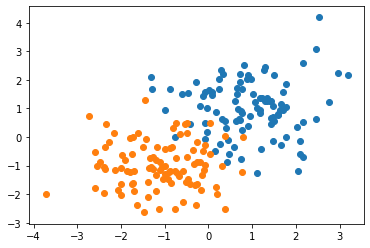

In [14]:
# generate dataset with two classes (labeled as 0 and 1)

cls1 = np.column_stack((np.random.normal(loc = [-1, -1], scale=[.9, .9], size=(100, 2)), np.ones(100)))
cls2 = np.column_stack((np.random.normal(loc = [1, 1], scale=[.9, .9], size=(100, 2)), np.zeros(100)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :-1]
labels = data_set[:, -1]

plt.scatter(features[labels == 0][:, 0], features[labels == 0][:, 1])
plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1])

# Classfication on the dataset

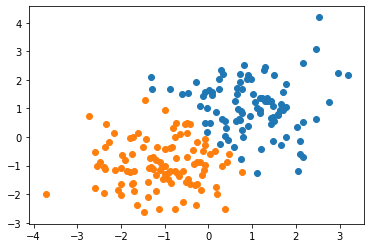

In [16]:
w = fit(features, labels)
labels_pred = predict(w, features)

plt.scatter(features[labels_pred == 0][:, 0], features[labels_pred == 0][:, 1])
plt.scatter(features[labels_pred == 1][:, 0], features[labels_pred == 1][:, 1])